In [27]:
# Necessary imports and file imports

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/Michele/Downloads/winwinewine/winemag-data-130k-v2.csv')
df.head()

# Some pre-processing and feature engineering will be required in order to make good predictions.
# What do we do with empty's or NaN's? I would rather not drop those wines entirely unless we have no price maybe?
# description should be dropped? Taster_twitter_handle drop?  
# Year of the wine is for sure an important aspect of the price because of the harvest. We should try to extract the year from the title?
# E.g. country,designation,province,region_1,region_2,taster_name, needs to be transformed 


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [23]:
labels = list(df.columns.values)

for label in labels:
    print(df[label].value_counts())
    


2047      1
21792     1
115986    1
118035    1
128276    1
         ..
33477     1
39622     1
37575     1
60104     1
0         1
Name: Unnamed: 0, Length: 129971, dtype: int64
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova              

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)         11
Korbel NV Brut Sparkling (California)                           9
Segura Viudas NV Extra Dry Sparkling (Cava)                     8
Ruinart NV Brut Rosé  (Champagne)                               7
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)            7
                                                               ..
Estancia 2006 Keyes Canyon Ranches Zinfandel (Paso Robles)      1
Isenhower 2006 Red Paintbrush Red (Columbia Valley (WA))        1
L. Tramier & Fils 2016 Tramier Pinot Noir (Vin de France)       1
Fuse 2012 Cabernet Sauvignon (Napa Valley)                      1
Kiona 2007 Reserve Estate Dry White Riesling (Red Mountain)     1
Name: title, Length: 118840, dtype: int64
Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Bobal-Cabernet Sauvignon    

In [37]:
data = df[['price','title']]
#print(data)
  
df = pd.DataFrame(data,columns=['price','title'])
print (df.info)

#df.drop_duplicates()
#print('dataframe without duplicates: ',df.info)
# --> there are no duplicates

titles = df['title'][:100]
prices = df['price'][:100]


<bound method DataFrame.info of         price                                              title
0         NaN                  Nicosia 2013 Vulkà Bianco  (Etna)
1        15.0      Quinta dos Avidagos 2011 Avidagos Red (Douro)
2        14.0      Rainstorm 2013 Pinot Gris (Willamette Valley)
3        13.0  St. Julian 2013 Reserve Late Harvest Riesling ...
4        65.0  Sweet Cheeks 2012 Vintner's Reserve Wild Child...
...       ...                                                ...
129966   28.0  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
129967   75.0                  Citation 2004 Pinot Noir (Oregon)
129968   30.0  Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969   32.0      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)
129970   21.0  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...

[129971 rows x 2 columns]>


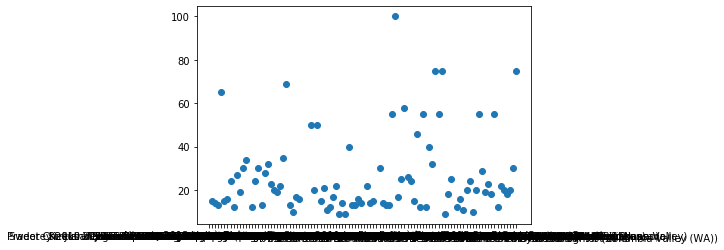

In [39]:
# i only printed the first 100 prices and titles of wines, because we have 130k datapoints. We will need to aggregate
# / group somehow first before we can show something that makes sense :) 

plt.subplot()
plt.scatter(titles, prices)
plt.show()